In [18]:
import numpy as np
import pysam

fn = "/home/lpryszcz/cluster/rna_mods/spermseq/mapping_bam/dorado.070.ivt_sup.no-trim/RNA400000_adapter.bam"
sam = pysam.AlignmentFile(fn)
for a in sam: break
a.cigar, a.cigarstring

([(5, 45), (0, 16), (1, 1), (0, 7), (5, 8)], '45H16M1I7M8H')

In [19]:
def get_rs_from_mv(a, tags, max_s=30000, windows=(450, 1000), polyA_ext=100):
    """Return read start in squiggle space using first aligned base as max start position"""
    trimmed_samples = tags['ts']
    mv = np.array(tags['mv'])
    stride, move = mv[0], mv[1:]
    move_pos = np.argwhere(move == 1).flatten() * stride + trimmed_samples
    cidx = 0 if a.is_reverse else -1
    end_skipped = a.cigar[cidx][1] if a.cigar[cidx][0] in (4, 5) else 0
    #rs = get_barcode_end(sig, 0, min(max_s, move_pos[end_skipped]), windows) + polyA_ext    
    return move_pos[end_skipped] #rs

tags = {k: v for k, v in a.tags}
get_rs_from_mv(a, tags)

330

In [10]:
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True
import pandas as pd
import seaborn as sns
sns.set_palette("Paired")

In [2]:
fn = "/home/lpryszcz/cluster/rna_mods/spermseq/mapping_bam/dorado.070.hac/plots/get_biotypes"
df = pd.read_csv(fn, sep="\t", index_col=0)

In [3]:
df.head()

,CU_HFD14_Prox_rep1,CU_HFD14_Dist_rep1,CU_HFD14_Dist_rep2,CU_HFD14_Dist_rep3,CU_HFD14_Prox_rep2,CU_HFD14_Prox_rep3,CU_SFD14_Dist_rep1_rep3,CU_SFD14_Dist_rep3,CU_SFD14_Prox_rep1_rep3,CU_SFD14_Prox_rep2
misc_RNA,11891,3989,3879,3183,13878,9951,3527,9664,9860,12454
scaRNA,2080,210,201,246,1848,1575,198,429,1689,1354
lncRNA,17126,2830,3884,2233,13169,11906,2812,6976,18231,15555
miRNA,1179,516,1281,392,1405,909,682,2204,1422,1239
snRNA,262489,61863,35915,126559,312916,271469,24871,58213,135804,185460


Text(0.5, 0, 'Fraction of mapped reads')

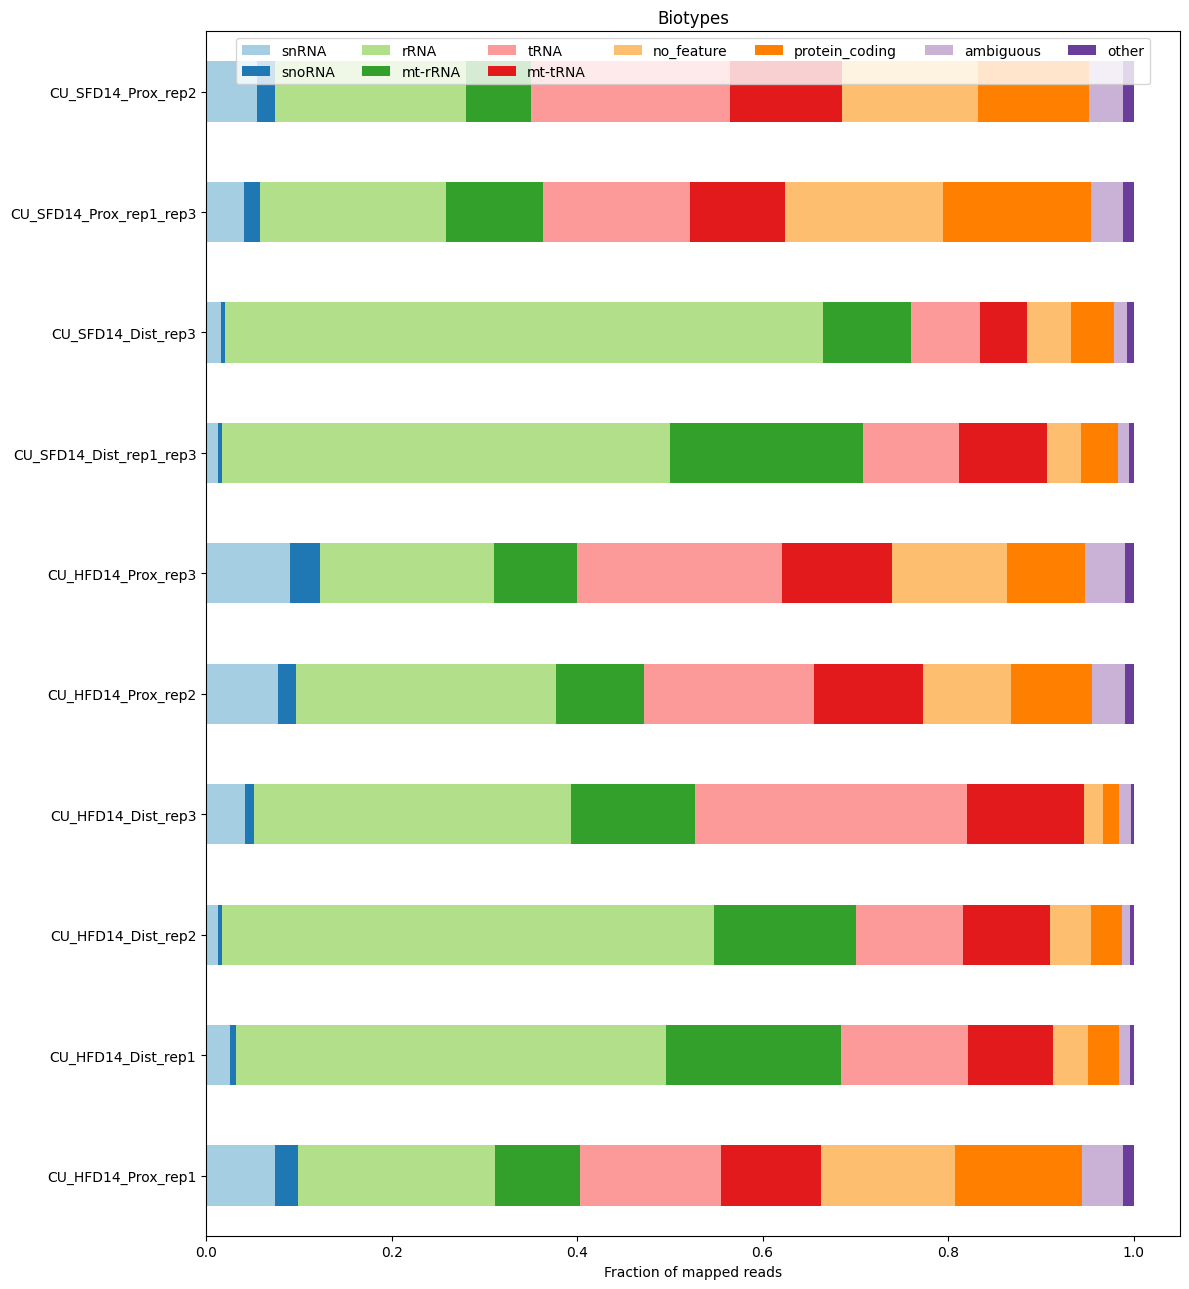

In [11]:
min_frac = 0.03

fracs = df.div(df.sum(axis=0), axis=1)
sel = fracs.max(axis=1)>=min_frac
df2 = fracs[sel].copy()
# accumulate low fractions as others
df2.loc["other"] = fracs[~sel].sum()
# plot
fig, ax = plt.subplots(figsize=(12, 3+df.shape[1]*1))
df2.T.plot(kind='barh', stacked=True, ax=ax)#, colormap=sns.color_palette("Paired"))
ax.legend(ncol=7, loc='upper center') # outside
ax.set_title("Biotypes")
ax.set_xlabel("Fraction of mapped reads")
